# Covid-19 Simple Data Analysis

In [281]:
import requests
import json
from bs4 import BeautifulSoup 
import pandas as pd
from matplotlib import pyplot as plt
from datetime import date,datetime

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 7

### Data source

In [301]:
# dataset url
url_json = "https://especiais.g1.globo.com/bemestar/coronavirus/mapa-coronavirus/data/brazil-cases.json"
json_data = requests.get(url_json,headers = {'User-Agent': 'Mozilla/5.0'})

# json parse
json_data = json_data.json()

# get updated last
updated_at = json_data['updated_at']


print(f">>> Última atualização: {updated_at} <<<")



# Checking and cleaning data

#df_json[df_json['date']=='Não informado']

#json_data.json()['docs']
df_json = pd.DataFrame(json_data['docs'])
df_json = df_json.sort_values(by='count', ascending=False)

# parse state
df_json['state'] = df_json['state'].astype('str')

# parse date
df_json['date'] = pd.to_datetime(df_json['date'], format='%Y-%m-%d',errors='coerce')

# shape
print(" Before remove invalid dates: {} rows.".format(df_json.shape[0]))


# remove invalid dates

df_json = df_json.query('date != "NaT"')
    
df_json = df_json.query('city_name != ""')

print(" After remove invalid dates: {} rows.".format(df_json.shape[0]))

>>> Última atualização: 02/04/2020, às 11:24 <<<
 Before remove invalid dates: 1281 rows.
 After remove invalid dates: 1272 rows.


### Functions

In [302]:
def plot_city(city, updated_at):
    df_ = df_json[df_json['city_name'] == city].sort_values(by='count', ascending=True)
    df_ = df_.set_index('date')
    
    ax = df_.loc[:, 'count'].plot(marker='o', linestyle='-',label=city)
    ax.set_ylabel("C a s o s")
    ax.set_xlabel("D a t a")
    
#    first_updated_at = df_.head(1).index[0].strftime('%d/%m/%Y')
    last_updated_at  = df_.tail(1).index[0].strftime('%d/%m/%Y')
#    ax.set_xlim(pd.Timestamp(first_updated_at), pd.Timestamp(last_updated_at))
    
    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

    # Turn on the minor TICKS, which are required for the minor GRID
    ax.minorticks_on()    
    
    # Customize the major grid
    ax.grid(which='major', linestyle='-', linewidth='0.5')#, color='red')
    # Customize the minor grid
    ax.grid(which='minor', linestyle=':', linewidth='0.5')#, color='black')    
    
    
    if updated_at[:updated_at.find(',')] != last_updated_at:
        updated_at = last_updated_at


def plot_all_in_one(top, updated_at=None):
    plt.rcParams['figure.figsize'] = 18, 12
    for city in df_json['city_name'].unique()[:top]:
        plot_city(city,updated_at)
    #plt.yscale('log')    
    plt.legend(loc="upper left") 
    plt.title(f"Evolução de casos em Top:{top} cidades com maior de número de casos. [última atualização: {updated_at}]")
    plt.show()

    
def plot_one_per_city(top, updated_at):
    plt.rcParams['figure.figsize'] = 12, 10
    for city in df_json['city_name'].unique()[:top]:
        plot_city(city,updated_at)
        plt.legend(loc="upper left")    
        plt.title(f"{city} [última atualização: {updated_at}]")
        plt.grid(True)
        plt.show()


In [303]:
df_json.dtypes

cases                 int64
city_cod            float64
city_name            object
count                 int64
date         datetime64[ns]
state                object
state_cod           float64
dtype: object

In [304]:
df_json.sort_values(by=['date','count'], ascending=False).head(20)

,cases,city_cod,city_name,count,date,state,state_cod
1279,22,3106200.0,Belo Horizonte,210,2020-04-02,MG,31.0
1270,18,4314902.0,Porto Alegre,208,2020-04-02,RS,43.0
1276,7,3136702.0,Juiz de Fora,31,2020-04-02,MG,31.0
1273,2,3144805.0,Nova Lima,21,2020-04-02,MG,31.0
1269,1,2800308.0,Aracaju,20,2020-04-02,SE,28.0
1277,3,3118601.0,Contagem,10,2020-04-02,MG,31.0
1267,1,1500800.0,Ananindeua,8,2020-04-02,PA,15.0
1268,3,1506807.0,Santarém,4,2020-04-02,PA,15.0
1275,1,3140001.0,Mariana,3,2020-04-02,MG,31.0
1274,2,3143906.0,Muriaé,3,2020-04-02,MG,31.0


In [305]:
df_json.query('city_name == "São Paulo"')

,cases,city_cod,city_name,count,date,state,state_cod
1133,540,3550308.0,São Paulo,2425,2020-04-01,SP,35.0
1008,613,3550308.0,São Paulo,1885,2020-03-31,SP,35.0
921,15,3550308.0,São Paulo,1272,2020-03-30,SP,35.0
834,29,3550308.0,São Paulo,1257,2020-03-29,SP,35.0
751,166,3550308.0,São Paulo,1228,2020-03-28,SP,35.0
663,135,3550308.0,São Paulo,1062,2020-03-27,SP,35.0
577,171,3550308.0,São Paulo,927,2020-03-26,SP,35.0
510,46,3550308.0,São Paulo,756,2020-03-25,SP,35.0
447,37,3550308.0,São Paulo,710,2020-03-24,SP,35.0
373,91,3550308.0,São Paulo,673,2020-03-23,SP,35.0


### Analyzing 

In [306]:
dfg1 = df_json.groupby(['city_name']).sum().sort_values(by='cases', ascending=False)
dfg1[['cases']].head(30)

,cases
city_name,
São Paulo,2425
Rio de Janeiro,697
Fortaleza,413
Brasília,370
Belo Horizonte,210
Porto Alegre,208
Manaus,179
Salvador,153
Curitiba,100


### Visualization

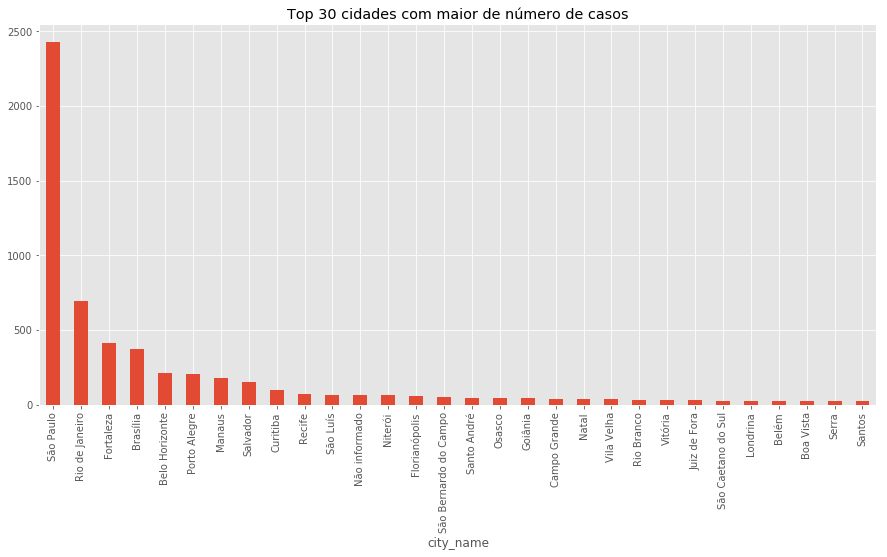

In [307]:
#plot data
top = 30
plt.rcParams['figure.figsize'] = 15, 7
dfg1.head(top)['cases'].plot.bar()
plt.grid(True)
plt.title(f"Top {top} cidades com maior de número de casos")
plt.show()

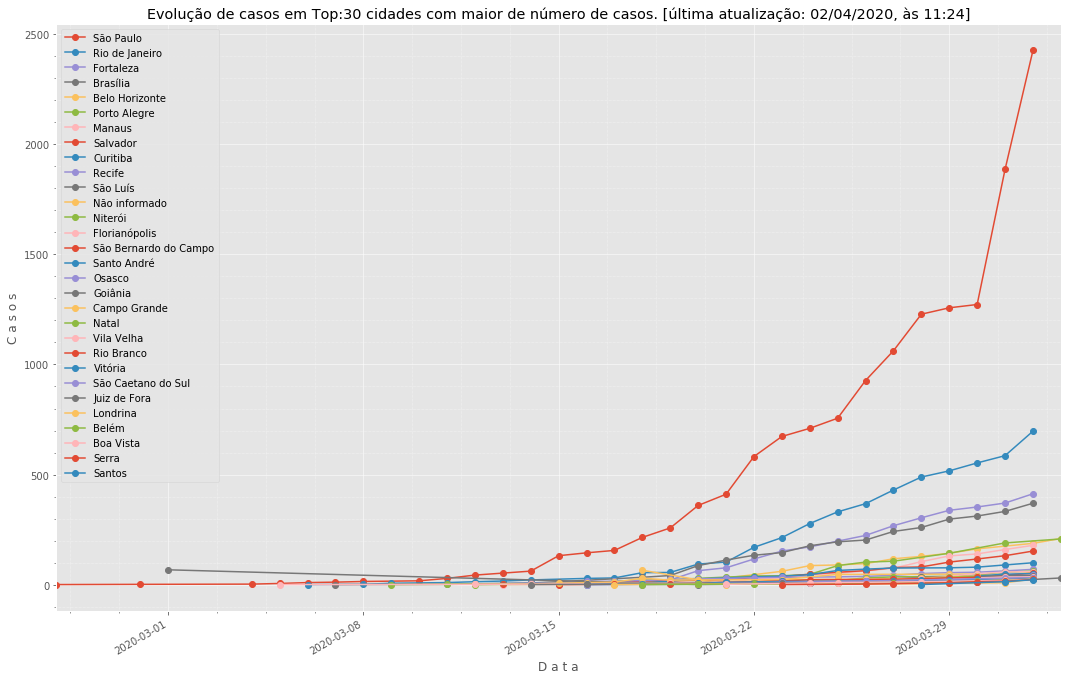

In [308]:
plot_all_in_one(top, updated_at)

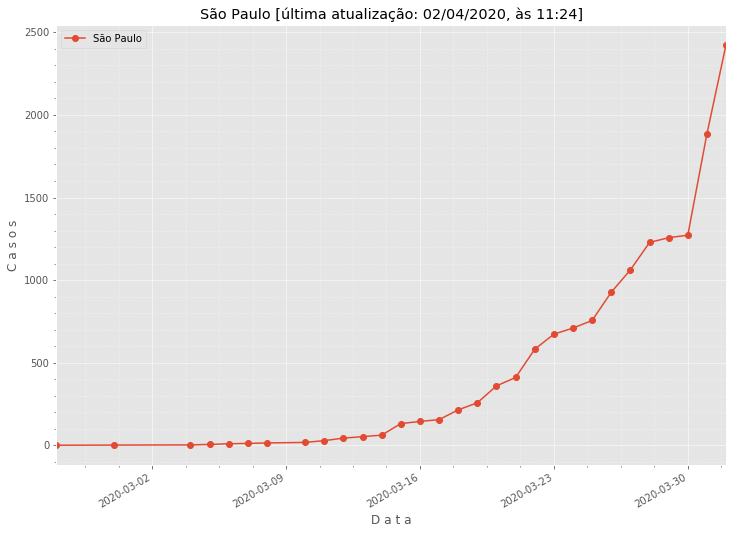

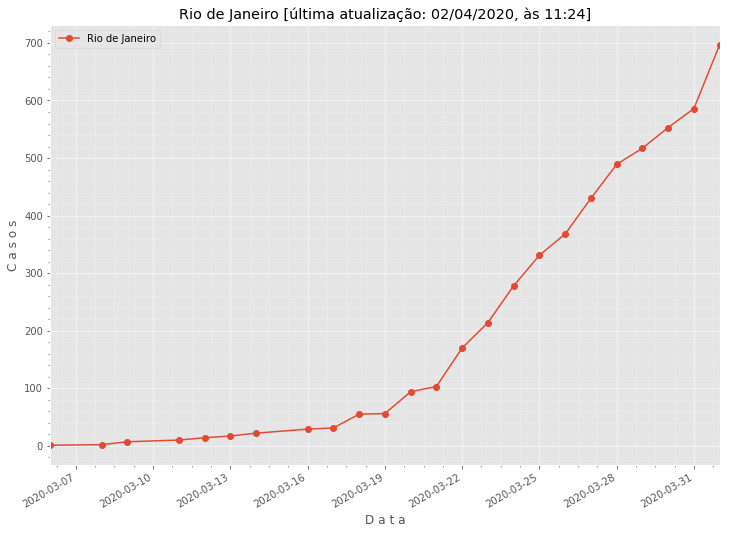

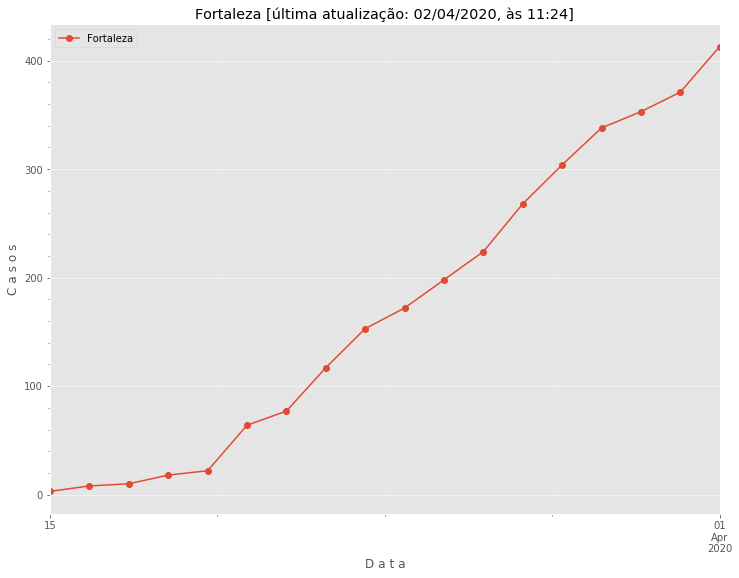

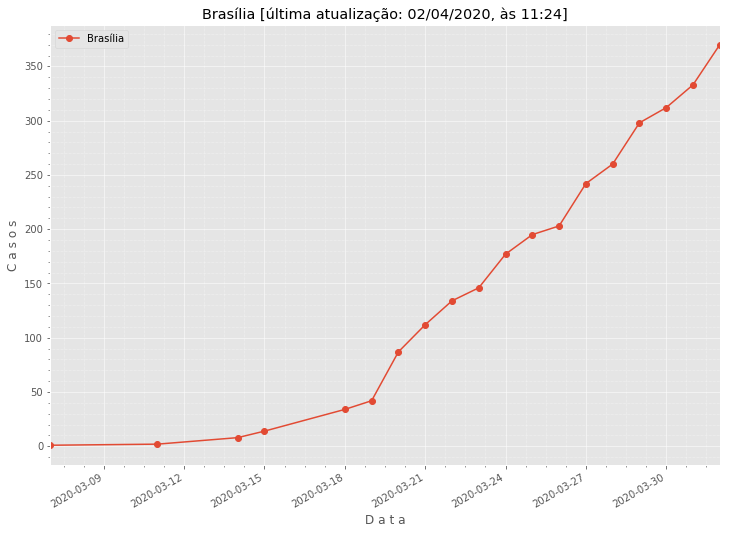

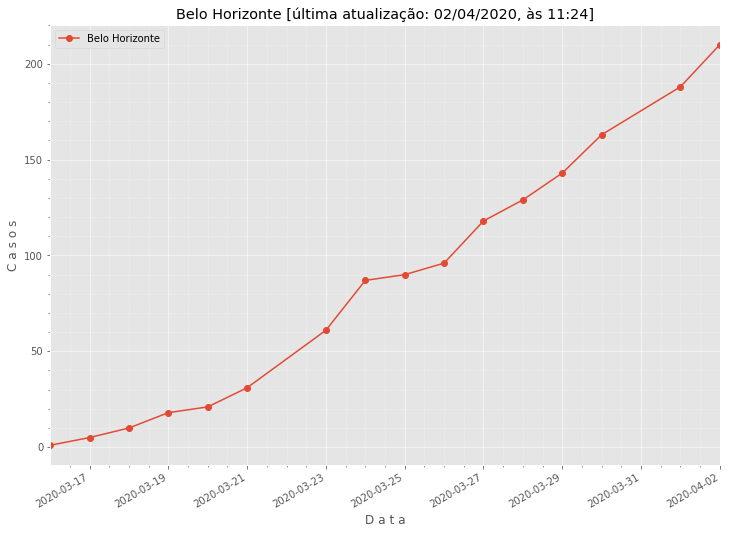

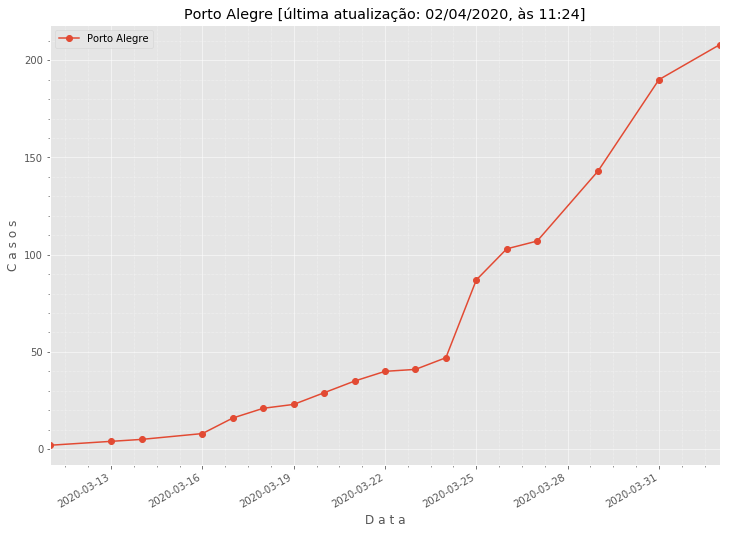

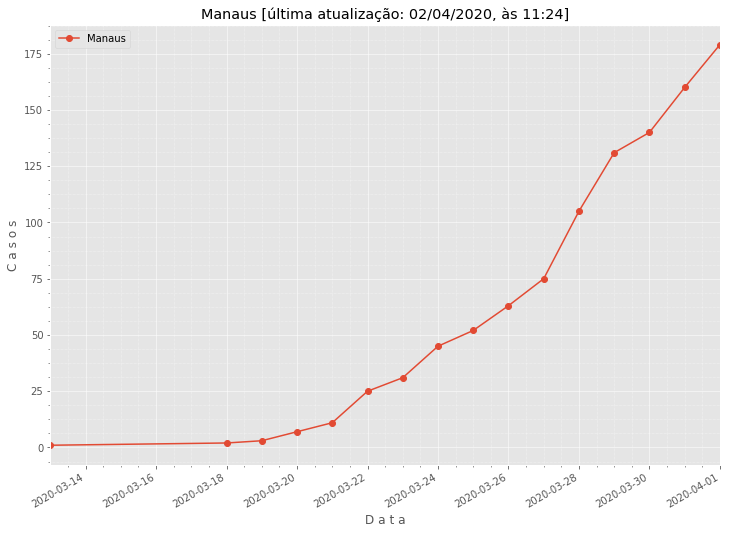

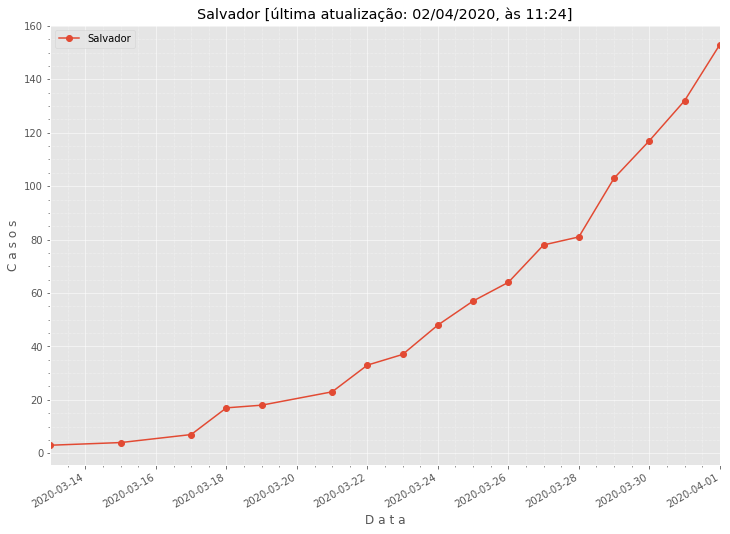

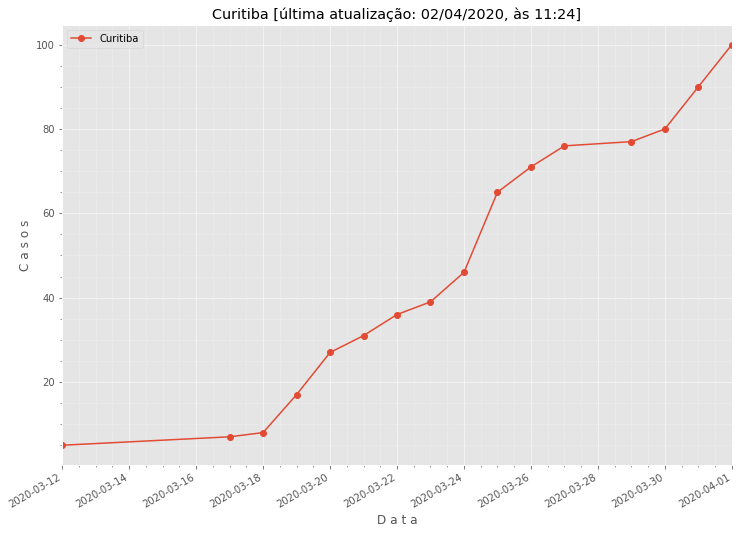

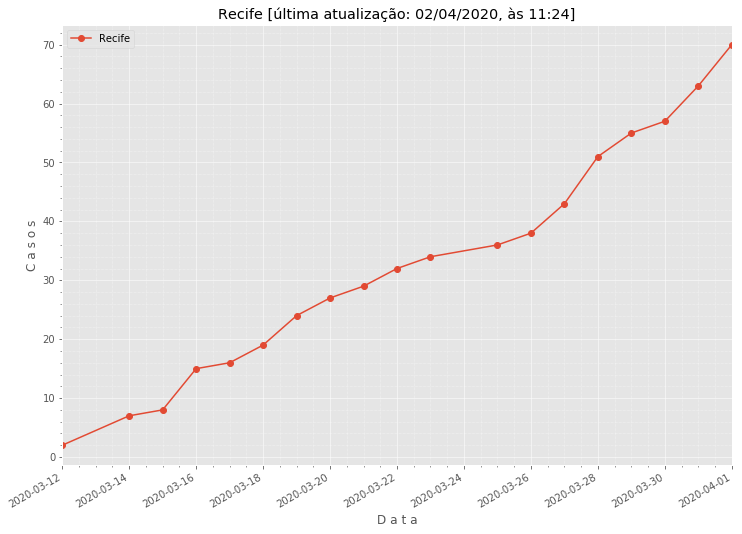

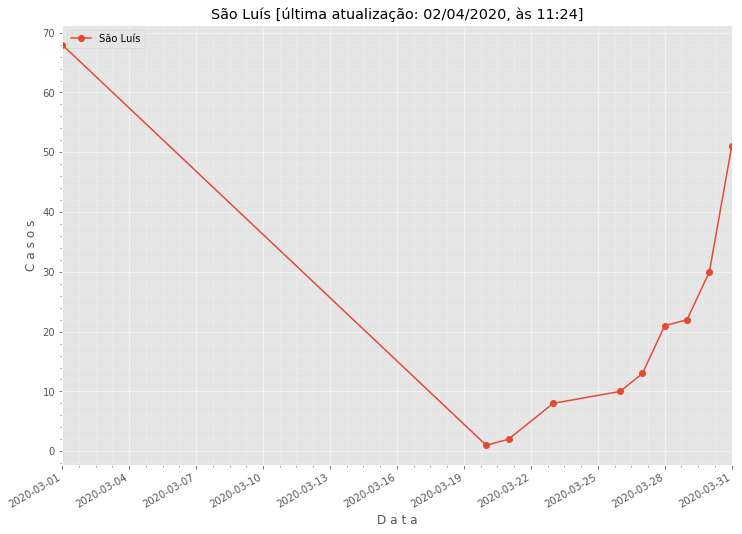

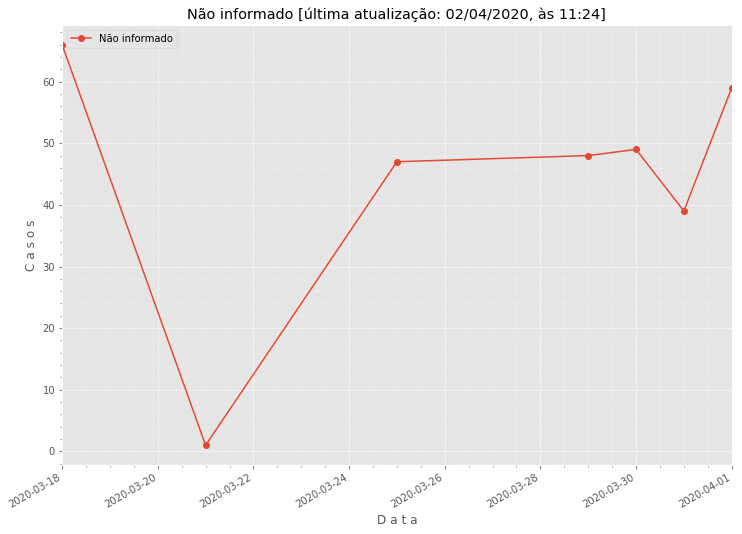

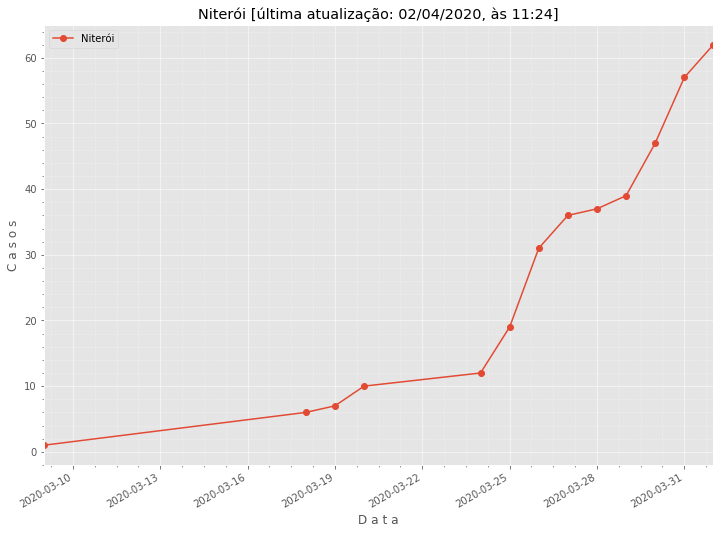

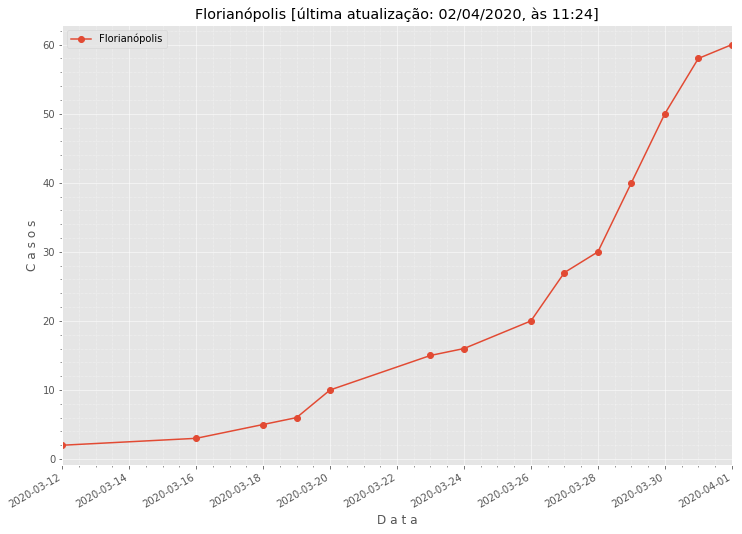

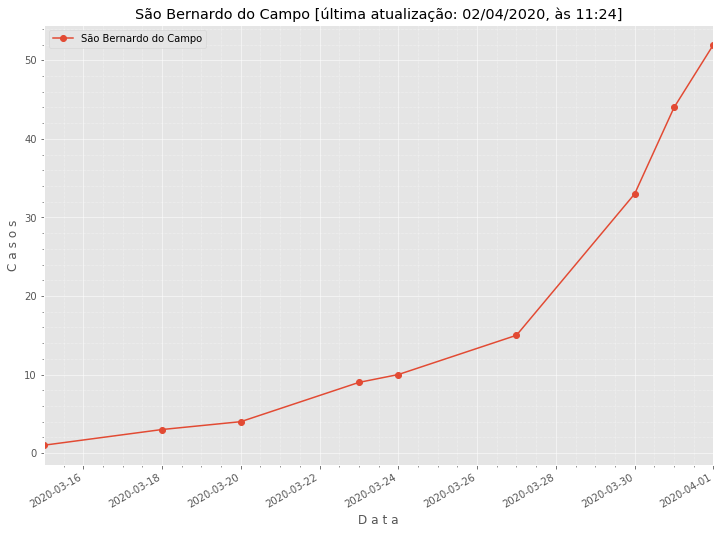

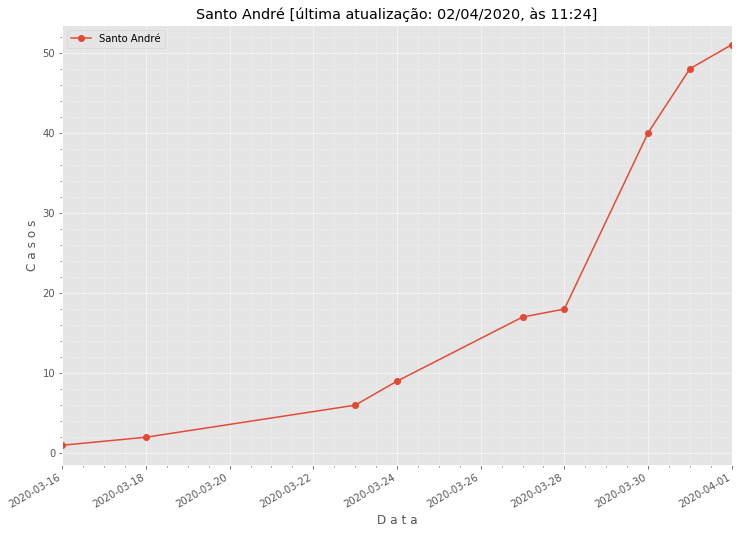

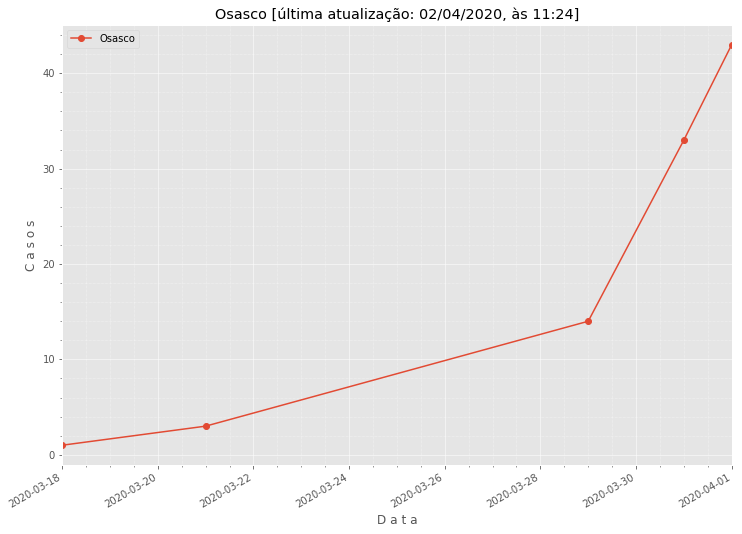

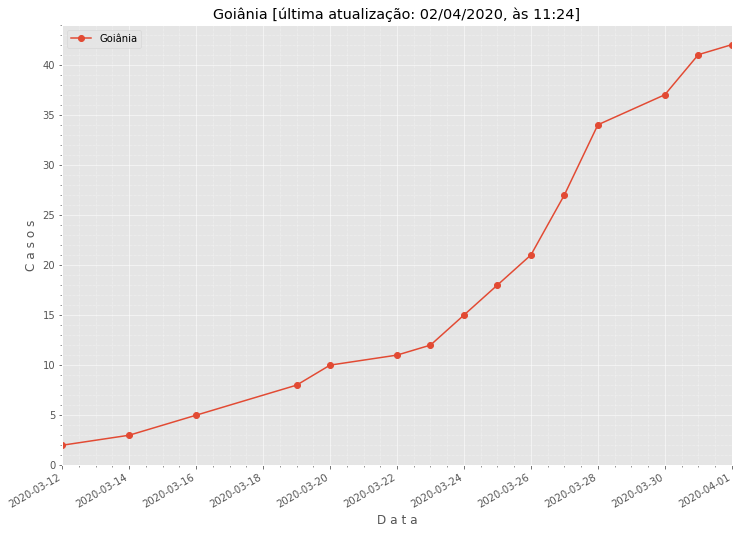

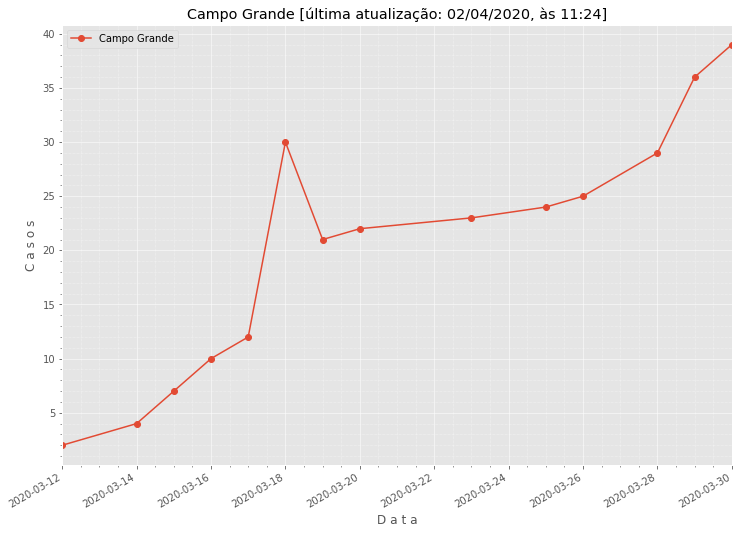

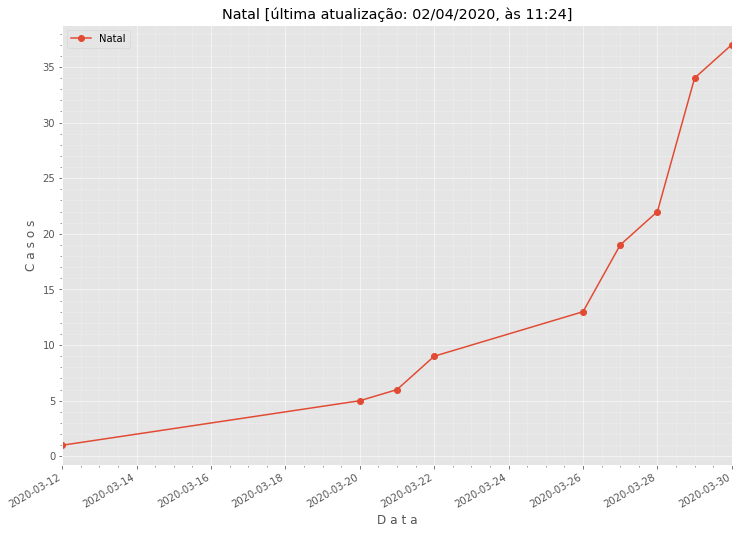

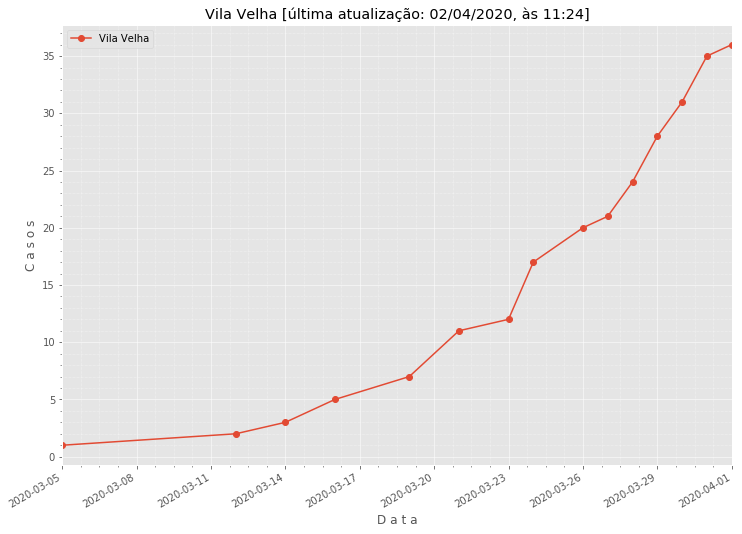

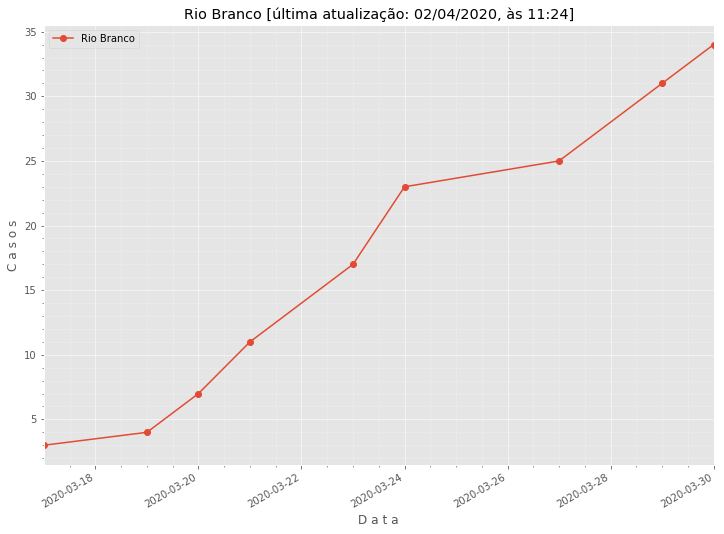

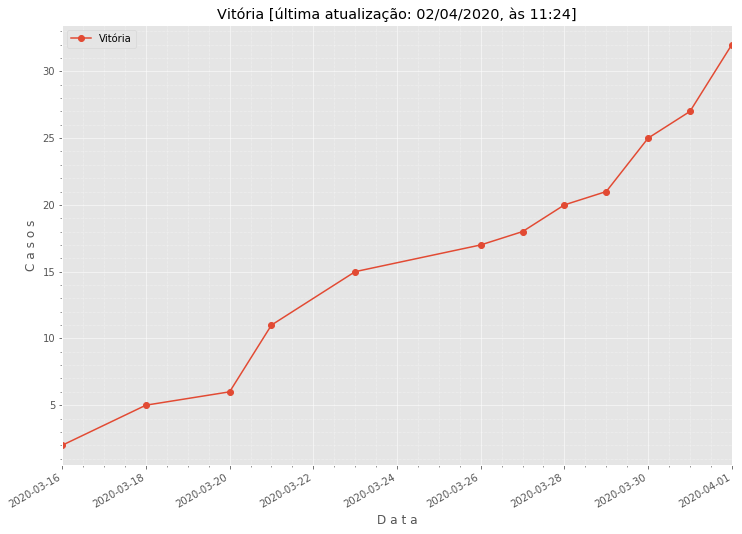

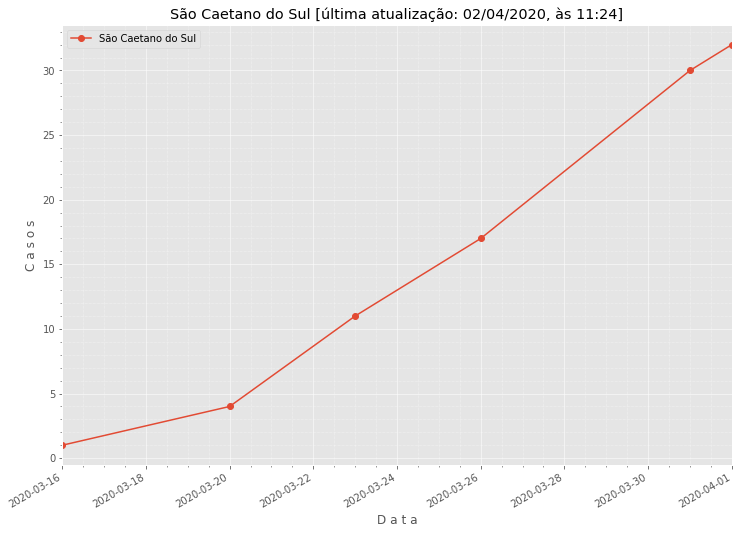

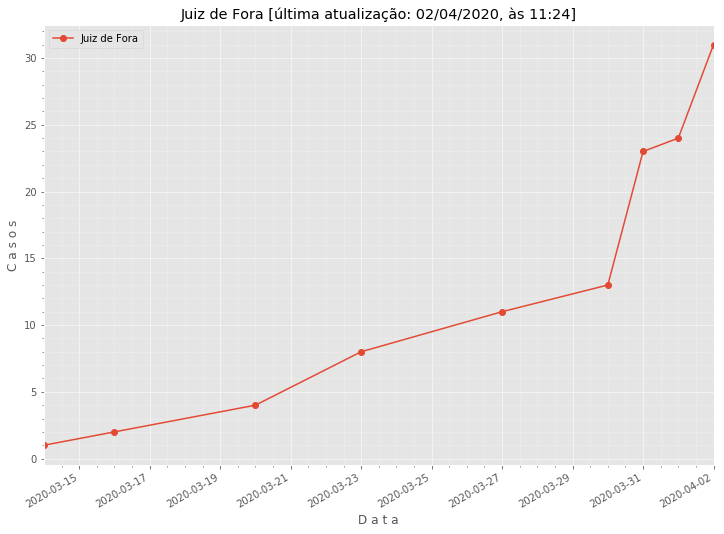

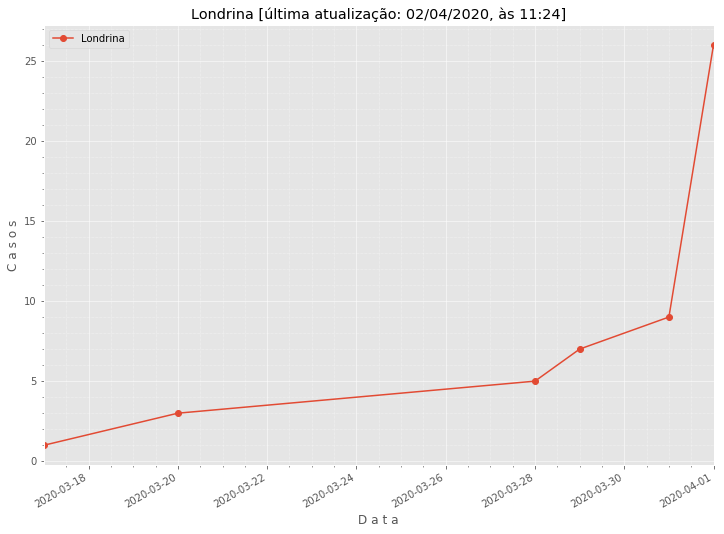

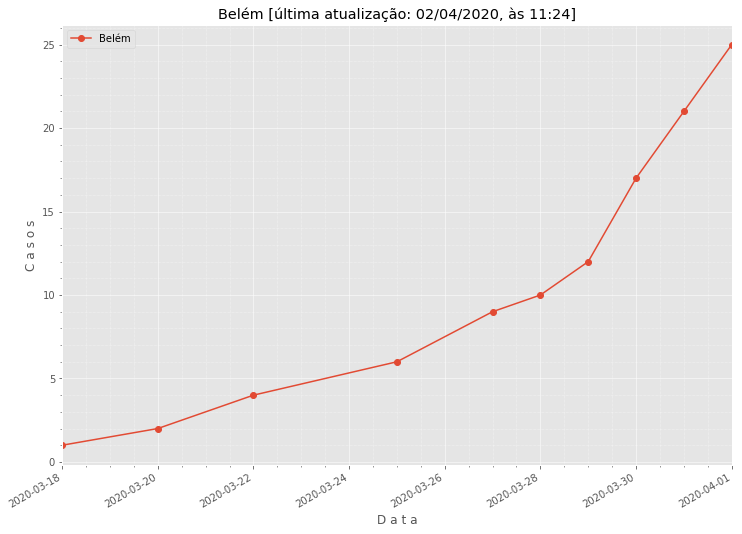

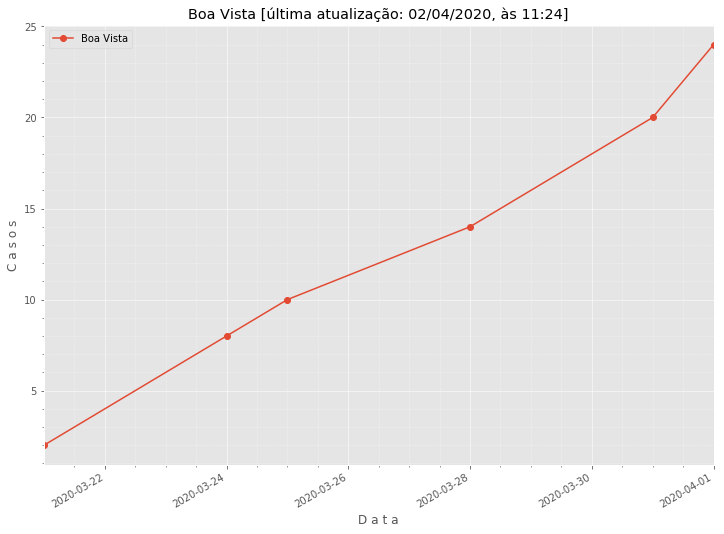

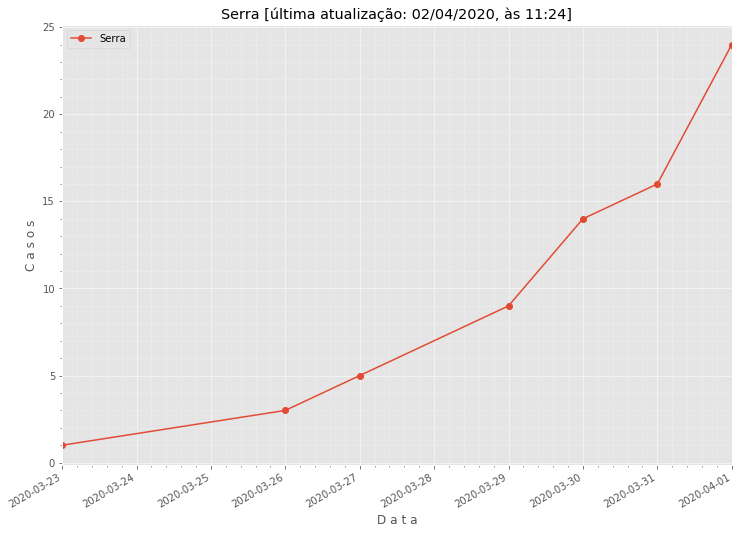

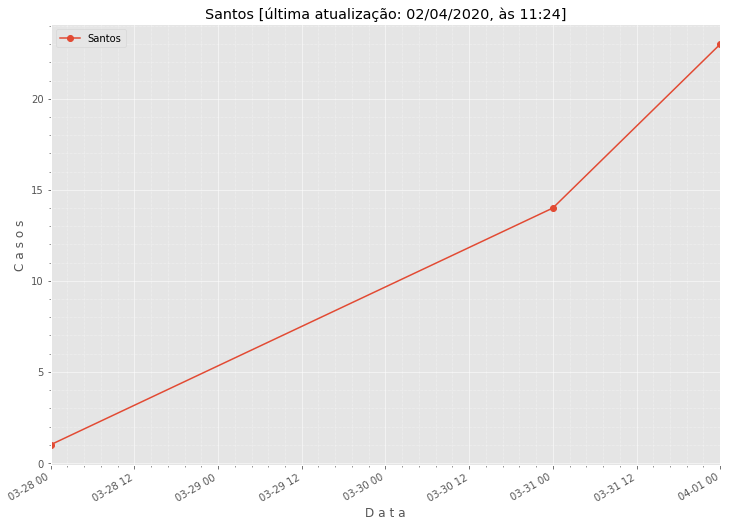

In [309]:
plot_by_city(top,updated_at)

### Some checks

In [175]:
df_json['city_name'].unique()[:top]

array(['São Paulo', 'Não informado', 'Rio de Janeiro', 'Fortaleza',
       'Brasília', 'Porto Alegre', 'Belo Horizonte', 'Manaus', 'Salvador',
       'Curitiba', 'Recife', 'Florianópolis', 'Niterói', 'São Luís',
       'Santo André', 'Campo Grande', 'Natal', 'Goiânia', 'Vila Velha',
       'Rio Branco', 'São Bernardo do Campo', 'Vitória', 'Juiz de Fora',
       'Belém', 'Guarulhos', 'Barueri', 'Boa Vista', 'Nova Lima',
       'Blumenau', 'Itajaí'], dtype=object)

In [176]:
df_json[df_json['city_name'] == 'Blumenau'].sort_values(by='date', ascending=False)

,cases,city_cod,city_name,count,date,state,state_cod
1079,5,4202404.0,Blumenau,19,2020-03-31,SC,42.0
997,2,4202404.0,Blumenau,14,2020-03-30,SC,42.0
698,3,4202404.0,Blumenau,12,2020-03-26,SC,42.0
626,2,4202404.0,Blumenau,9,2020-03-25,SC,42.0
504,1,4202404.0,Blumenau,7,2020-03-23,SC,42.0
447,6,4202404.0,Blumenau,6,2020-03-22,SC,42.0


In [49]:
df_json[df_json['city_name'] == ''].sort_values(by='date', ascending=True)

,cases,city_cod,city_name,count,date,state,state_cod


In [50]:
df_json.query('city_name == ""')

,cases,city_cod,city_name,count,date,state,state_cod
